In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

import itertools

data_train = pd.read_csv('X_train_rakuten_afterEDA_preprocessing.csv',index_col=0)
data_train = data_train.reset_index(drop=False)
data_train['nom_img'] = r"C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\" + data_train['nom_img']
data_train.shape

Using TensorFlow backend.


(84613, 6)

In [2]:
#display columns including product images (nom_img)
data_train.head()

,designation_orig,nom_img,lang_designation,designation,prdtypecode,designation_token_final
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,C:\Users\admin\Documents\projet_Rakuten\croppe...,de,olivia: notebook personnalise / pages / punks...,10,"['notebook', 'page', 'design']"
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,journal des art (le) n° du // art et son ma...,2280,"['journal', 'art', 'art', 'marche', 'salon', '..."
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,grand stylet ergonomique bleu gamepad nintendo...,50,"['stylet', 'ergonomique', 'gamepad', 'nintendo..."
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,peluche donald europe disneyland (marionn...,1280,"['peluche', 'donald', 'europe', 'disneyland', ..."
4,La Guerre Des Tuques Luc a des idées de grande...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,la guerre des tuques luc a des idees de grande...,2705,"['guerre', 'luc', 'idees', 'grandeur', 'vouloi..."


In [3]:
#delete rows where images are smaller than 2k equal to noise rather than information
from pathlib import Path

list_products_to_be_deleted_due_to_too_small_image = []
nbr_to_be_deleted = 0
for i in range(len(data_train)):
    fname = data_train['nom_img'].iloc[i]
    file_size =Path(fname).stat().st_size
    if (file_size < 2048):
        print("The file {0} has a too small size of {1} bytes ".format(fname,file_size))
        list_products_to_be_deleted_due_to_too_small_image.append(i)
        nbr_to_be_deleted += 1

#rows deletion
print("number of deleted rows due to image size smaller than 2K :",nbr_to_be_deleted)
print(data_train.shape)
data_train = data_train.drop(list_products_to_be_deleted_due_to_too_small_image)
print("new shape of dataset after preprocessing : ", data_train.shape)




The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_332521213_product_46540267.jpg has a too small size of 1597 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1289984514_product_4090784667.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1216298756_product_3479934811.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026005405_product_558486639.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1252146802_product_3845529844.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026005681_product_558486488.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1166709808_product_2823853943.jpg has a too small size of 0 bytes 
T

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1211445448_product_3399885350.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1070289526_product_1267241290.jpg has a too small size of 872 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1157672745_product_2688189930.jpg has a too small size of 1877 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1211351615_product_3396526513.jpg has a too small size of 1590 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1264896275_product_3928053533.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1018396218_product_510785964.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1018395303_product_510784728.jpg has a too small size of 0 

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026055758_product_559361847.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_862578904_product_102702741.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1282537822_product_4057634640.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1322050478_product_4228953361.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1174588133_product_2940639052.jpg has a too small size of 1578 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1045589330_product_293227446.jpg has a too small size of 2046 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1275705008_product_4006536216.jpg has a too small size of 0 byte

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1320454565_product_4224617065.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026056006_product_559361461.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1250261846_product_3831237327.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026011651_product_558486945.jpg has a too small size of 683 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1203568974_product_3279391943.jpg has a too small size of 2011 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_941622258_product_207151544.jpg has a too small size of 2015 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1159687976_product_2718172568.jpg has a too small size of 0 by

In [4]:
#cell not necessary to be executed ONLY kept for information 
# used for study on image input size decision : 150 x 150 pixels
from pathlib import Path
nb_img_10kb = 0
nb_img_50kb = 0
nb_img_50_100kb = 0
nb_img_100_150kb = 0
nb_im_150kb = 0

for i in range(len(data_train)):
    fname = data_train['nom_img'].iloc[i]
    file_size =Path(fname).stat().st_size
    if (file_size < 51200):       
        nb_img_50kb += 1
        if (file_size < 10240):
            nb_img_10kb += 1
    elif (51200 <= file_size < 102400):
        nb_img_50_100kb +=1
    elif (102400 <= file_size < 153600):
        nb_img_100_150kb +=1
    else:
        nb_im_150kb +=1
print("amount of images with  size less than 50 kb :", nb_img_50kb)
print("amount of images with size higher than 50 kb :",nb_img_50_100kb + nb_img_100_150kb + nb_im_150kb )
print("Remember : 67.5 kb is the image size choosen as input to the ConvNet that is 150 * 150 pixels with 3 color channels")
print("amount of original images with size quite small , less than 10 kb : ",nb_img_10kb)

amount of images with  size less than 50 kb : 45726
amount of images with size higher than 50 kb : 38650
Remember : 67.5 kb is the image size choosen as input to the ConvNet that is 150 * 150 pixels with 3 color channels
amount of original images with size quite small , less than 10 kb :  3095


In [4]:
#training and validation set , not yet test set 
#only image names column and related class kept
target = data_train.prdtypecode
data_train = data_train.drop(['designation_orig','lang_designation','designation','designation_token_final','prdtypecode'],axis=1)

#Diviser aléatoirement les données en un ensemble d'entraînement et un ensemble de test 
X_train, X_test, y_train, y_test = train_test_split(data_train,target, test_size=0.2, random_state=66)

df_train = pd.concat([X_train,y_train],axis=1)
df_train = df_train.reset_index(drop=True)
df_test = pd.concat([X_test,y_test],axis=1)
df_test = df_test.reset_index(drop=True)

name_class = ['editions','magazines',"equipement_playstation","jouets_enfant","livres","fournitures_scolaires","materiel_jardin","mobilier_interieur","jeux_enfants","literie","livres_par_lot","figurine","materiel_piscine","univers_de_fiction","equipements_telecommandes","materiel_jeux_video","jeux_de_cartes_collection","decoration","jeux_video","console_de_jeu","materiel_bebe","peche_lampe_plein_air","materiel_animaux_compagnie","jeux_sur_PC","accessoires_outil","articles_nourriture","vetements_nouveau-né_et_billard_flechettes"] 
list_class = [10, 2280 ,  50 ,1280 ,2705, 2522, 2582, 1560, 1281, 1920, 2403, 1140, 2583, 1180, 1300 ,2462, 1160, 2060 , 40,   60 ,1320 ,1302 ,2220 ,2905, 2585, 1940 ,1301]       
list_class_onehot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

# df_train and df_test will be used to build the batchs !!!!!!
df_train['class_onehot']= 0
for i in range(len(df_train)):
    index = list_class.index(df_train['prdtypecode'].iloc[i])
    df_train['class_onehot'].iloc[i] = list_class_onehot[index]

df_test['class_onehot']= 0
for i in range(len(df_test)):
    index = list_class.index(df_test['prdtypecode'].iloc[i])
    df_test['class_onehot'].iloc[i] = list_class_onehot[index]

display(df_train.head(50))

print("\ndimension training set :",df_train.shape)
print("dimension test set :",df_test.shape)


C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,nom_img,prdtypecode,class_onehot
0,C:\Users\admin\Documents\projet_Rakuten\croppe...,1302,21
1,C:\Users\admin\Documents\projet_Rakuten\croppe...,2403,10
2,C:\Users\admin\Documents\projet_Rakuten\croppe...,1280,3
3,C:\Users\admin\Documents\projet_Rakuten\croppe...,2280,1
4,C:\Users\admin\Documents\projet_Rakuten\croppe...,1302,21
5,C:\Users\admin\Documents\projet_Rakuten\croppe...,2705,4
6,C:\Users\admin\Documents\projet_Rakuten\croppe...,1302,21
7,C:\Users\admin\Documents\projet_Rakuten\croppe...,2583,12
8,C:\Users\admin\Documents\projet_Rakuten\croppe...,2583,12
9,C:\Users\admin\Documents\projet_Rakuten\croppe...,1280,3



dimension training set : (67500, 3)
dimension test set : (16876, 3)


In [5]:
# creation of customized Data Generator 
# cell to be executed for any model

class CustomDataGen(tf.keras.utils.Sequence):
    def __init__(self, df, X_col, y_col,
                 batch_size,
                 input_size=(150, 150, 3),
                 shuffle=False):
        
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        
        self.n = len(self.df)
        self.n_classes = df[y_col['class_onehot']].nunique()
        
    def on_epoch_end(self):
        pass
    
    def __get_input(self, path, target_size):
        
        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)

        image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
        # shape of image_arr is (150,150,3)
        
        return image_arr/255.
    
    def __get_output(self, label, num_classes):
        return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    
    def __get_data(self, batches):
        # Generates data containing batch_size samples

        image_batch = batches[self.X_col['nom_img']]
                
        class_batch = batches[self.y_col['class_onehot']]
        
        X_batch = np.asarray([self.__get_input(x, self.input_size) for x in image_batch])

        y_batch = np.asarray([self.__get_output(y, self.n_classes) for y in class_batch])
        
        return X_batch, y_batch
    
    def __getitem__(self, index):
        
        #index is manages by fit method
        batches = self.df[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__get_data(batches)
        return X, y
    
    
    def __len__(self):
        return self.n // self.batch_size 

In [5]:
# CNN model with input images expected in color (3 channels RGB ) and coded on (150,150) pixels 
# Big thought to historical LeNet-5 , one of the earliest pre-trained models 
# proposed by Yann LeCun and others in the year 1998.

# note : no dropout regularization used for the moment to avoid overfitting
model = Sequential()

first_layer = Conv2D(filters = 32,
                     kernel_size = (3, 3),
                     padding = 'valid',
                     input_shape = (150, 150, 3),
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Conv2D(filters = 64,
                     kernel_size = (3, 3),
                     activation = 'relu')

fourth_layer = MaxPooling2D(pool_size = (2, 2))

fifth_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

sixth_layer = MaxPooling2D(pool_size = (2, 2))

seventh_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

eighth_layer = MaxPooling2D(pool_size = (2, 2))

ninth_layer = Flatten()

tenth_layer = Dense(units = 512,
                    activation = 'relu')

output_layer = Dense(units = 27,
                     activation='softmax')

model.add(first_layer)
model.add(second_layer)
model.add(third_layer)
model.add(fourth_layer)
model.add(fifth_layer)
model.add(sixth_layer)
model.add(seventh_layer)
model.add(eighth_layer)
model.add(ninth_layer)
model.add(tenth_layer)
model.add(output_layer)

In [6]:
#4 modules,blocks of feature map 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [7]:
model.compile(loss='categorical_crossentropy', # loss function multiclass             
              optimizer='adam',                # optimisation algorithm
              metrics=['accuracy'])            # evaluation metrics

In [9]:
# training of the ConvNet 
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history = model.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

Epoch 1/10
2109/2109 [==============================] - 472s 224ms/step - loss: 2.5351 - accuracy: 0.2735 - val_loss: 1.7381 - val_accuracy: 0.3600
Epoch 2/10
2109/2109 [==============================] - 429s 204ms/step - loss: 2.0605 - accuracy: 0.4006 - val_loss: 1.7001 - val_accuracy: 0.4166
Epoch 3/10
2109/2109 [==============================] - 429s 203ms/step - loss: 1.7822 - accuracy: 0.4733 - val_loss: 1.6591 - val_accuracy: 0.4148
Epoch 4/10
2109/2109 [==============================] - 427s 202ms/step - loss: 1.5009 - accuracy: 0.5497 - val_loss: 1.6643 - val_accuracy: 0.4292
Epoch 5/10
2109/2109 [==============================] - 428s 203ms/step - loss: 1.2007 - accuracy: 0.6333 - val_loss: 2.0596 - val_accuracy: 0.4259
Epoch 6/10
2109/2109 [==============================] - 427s 203ms/step - loss: 0.9069 - accuracy: 0.7184 - val_loss: 2.5937 - val_accuracy: 0.4234
Epoch 7/10
2109/2109 [==============================] - 436s 207ms/step - loss: 0.6723 - accuracy: 0.7880 - val_

In [10]:
#good practise : always save model after training
model.save('Rakuten_baseline.h5')

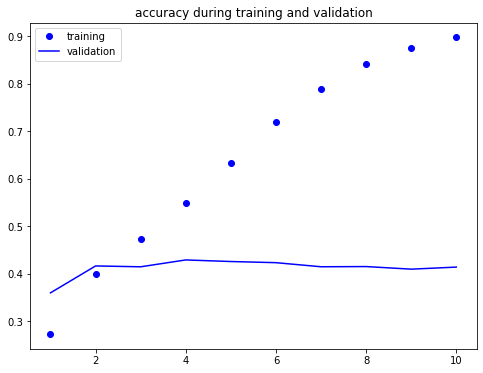

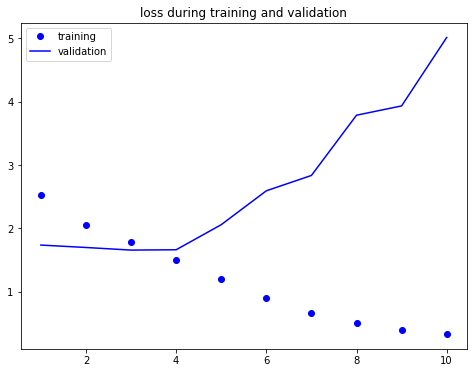

In [15]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network 
#with accuracy increasing linearly on training set to almost reaching 100%
#and stabilized around 42% for validation 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc,'bo',label='training')
plt.plot(epochs,val_acc,'b',label='validation')
plt.title('accuracy during training and validation for baseline CNN')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss,'bo',label='training')
plt.plot(epochs,val_loss,'b',label='validation')
plt.title('loss during training and validation for baseline CNN')
plt.legend();

In [6]:
# CNN model with input images expected in color (3 channels RGB ) and coded on (150,150) pixels 
# Big thought to historical LeNet-5 , one of the earliest pre-trained models 
# proposed by Yann LeCun and others in the year 1998.

# note : with dropout regularization used to avoid partly overfitting
model1 = Sequential()

first_layer = Conv2D(filters = 32,
                     kernel_size = (3, 3),
                     padding = 'valid',
                     input_shape = (150, 150, 3),
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Conv2D(filters = 64,
                     kernel_size = (3, 3),
                     activation = 'relu')

fourth_layer = MaxPooling2D(pool_size = (2, 2))

fifth_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

sixth_layer = MaxPooling2D(pool_size = (2, 2))

seventh_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

eighth_layer = MaxPooling2D(pool_size = (2, 2))

ninth_layer = Flatten()

tenth_layer = Dropout(0.5)

eleventh_layer = Dense(units = 512,
                    activation = 'relu')

output_layer = Dense(units = 27,
                     activation='softmax')

model1.add(first_layer)
model1.add(second_layer)
model1.add(third_layer)
model1.add(fourth_layer)
model1.add(fifth_layer)
model1.add(sixth_layer)
model1.add(seventh_layer)
model1.add(eighth_layer)
model1.add(ninth_layer)
model1.add(tenth_layer)
model1.add(eleventh_layer)
model1.add(output_layer)

In [7]:
#4 modules,blocks of feature map 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [8]:
model1.compile(loss='categorical_crossentropy', # loss function multiclass             
              optimizer='adam',                # optimisation algorithm
              metrics=['accuracy'])            # evaluation metrics

In [9]:
# training of the ConvNet with Dropout for classifier input
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history1 = model1.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

Epoch 1/10
2109/2109 [==============================] - 443s 210ms/step - loss: 2.5400 - accuracy: 0.2712 - val_loss: 2.0645 - val_accuracy: 0.3461
Epoch 2/10
2109/2109 [==============================] - 426s 202ms/step - loss: 2.1569 - accuracy: 0.3746 - val_loss: 1.7452 - val_accuracy: 0.4073
Epoch 3/10
2109/2109 [==============================] - 422s 200ms/step - loss: 1.9771 - accuracy: 0.4206 - val_loss: 1.7381 - val_accuracy: 0.4274
Epoch 4/10
2109/2109 [==============================] - 422s 200ms/step - loss: 1.8312 - accuracy: 0.4572 - val_loss: 1.7302 - val_accuracy: 0.4297
Epoch 5/10
2109/2109 [==============================] - 422s 200ms/step - loss: 1.7069 - accuracy: 0.4903 - val_loss: 1.4030 - val_accuracy: 0.4465
Epoch 6/10
2109/2109 [==============================] - 420s 199ms/step - loss: 1.5978 - accuracy: 0.5173 - val_loss: 1.5088 - val_accuracy: 0.4511
Epoch 7/10
2109/2109 [==============================] - 425s 202ms/step - loss: 1.4953 - accuracy: 0.5455 - val_

In [10]:
#good practise : always save model after training
model1.save('Rakuten_baseline_with_Dropout.h5')

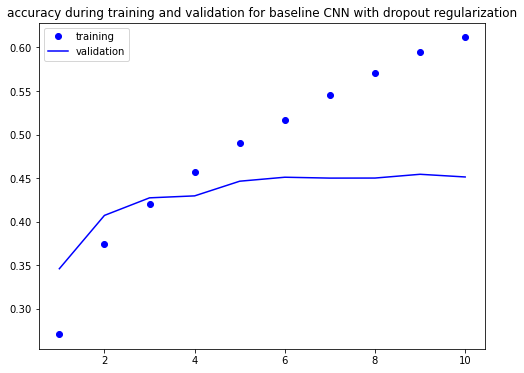

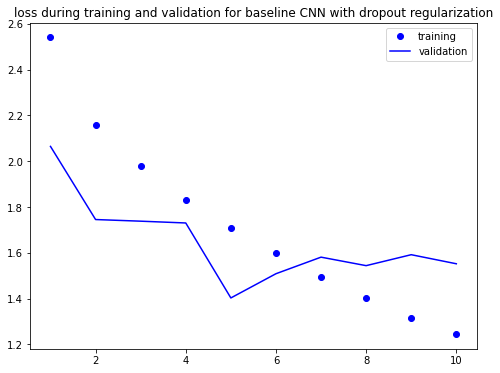

In [11]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network but dropout effet is visible
#with accuracy increasing linearly on training set but its slope is less than pure CNN 
#(60% of accuracy after 10 epochs comparing with 90% of the model without the dropout)
#and stabilized around 45% for validation (3% better than pure CNN)
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs = range(1,len(acc1)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc1,'bo',label='training')
plt.plot(epochs,val_acc1,'b',label='validation')
plt.title('accuracy during training and validation for baseline CNN with dropout regularization')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss1,'bo',label='training')
plt.plot(epochs,val_loss1,'b',label='validation')
plt.title('loss during training and validation for baseline CNN with dropout regularization')
plt.legend();

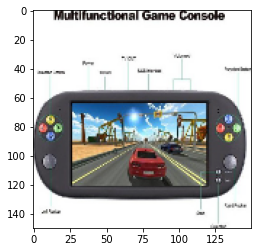

predicted probabilities of the 27 classes :
 [[3.8844178e-04 3.8118571e-05 2.1597662e-04 2.4368903e-03 1.0566720e-02
  2.2207780e-06 8.5158455e-05 3.4877907e-05 3.8836138e-06 2.1526153e-05
  1.4997761e-04 1.0777811e-05 1.2414291e-06 2.1438068e-06 5.5146246e-04
  3.0622954e-04 3.1338951e-07 1.3116463e-05 1.6205518e-04 9.8474771e-01
  2.8827615e-06 3.2690837e-06 1.3000564e-06 5.5394008e-05 1.6227957e-04
  1.4581930e-09 3.6069574e-05]]

predicted product class for this image : 60 console_de_jeu
      real Rakuten class               : 60 console_de_jeu


In [14]:
#elementary display of one image and its class prediction
from keras.models import load_model
model1_sav = load_model('Rakuten_baseline_with_Dropout.h5')

def transform_image(path, target_size):
    """function that converts an image into a tensor 4D"""
    image = tf.keras.preprocessing.image.load_img(path)
    image_arr = tf.keras.preprocessing.image.img_to_array(image)

    image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
    image_arr = np.expand_dims(image_arr,axis=0)
    
    return image_arr/255.

target_size = (150,150,3)
img_tensor = transform_image(df_test['nom_img'].iloc[2], target_size)
#print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

test_pred = model1_sav.predict(img_tensor)
num_classes = 27
y_test = tf.keras.utils.to_categorical(df_test['class_onehot'].iloc[2], num_classes=num_classes)

print("predicted probabilities of the 27 classes :\n",test_pred)
test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax()
print("")
print("predicted product class for this image :",list_class[test_pred_class[0]], name_class[test_pred_class[0]])
print("      real Rakuten class               :",list_class[y_test_class], name_class[y_test_class])




In [16]:
#Note : global prediction on df_test, data set not completely unknown as already used for model validation 
#methodology train, validation and test sets not strictly respected :-)

import time

test_pred_class = []
y_test_class = []
target_size = (150,150,3)
num_classes = 27

start = time.time()
for i in range(len(df_test)):
    img_tensor = transform_image(df_test['nom_img'].iloc[i], target_size)
    test_pred = model1_sav.predict(img_tensor)
    test_pred_class_img = test_pred.argmax(axis = 1)
    test_pred_class.append(list_class[test_pred_class_img[0]])
    
    y_test = tf.keras.utils.to_categorical(df_test['class_onehot'].iloc[i], num_classes=num_classes)
    y_test_class_img = y_test.argmax()
    y_test_class.append(list_class[y_test_class_img])
    
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')
    

print(metrics.classification_report(y_test_class, test_pred_class))


print("top 3 f1-score for classes :",name_class[list_class.index(1160)],name_class[list_class.index(2583)],name_class[list_class.index(1920)])



cell execution duration : 2.00 mn
              precision    recall  f1-score   support

          10       0.40      0.32      0.36       597
          40       0.50      0.40      0.45       509
          50       0.35      0.19      0.24       335
          60       0.37      0.35      0.36       179
        1140       0.42      0.36      0.39       512
        1160       0.82      0.79      0.81       774
        1180       0.34      0.21      0.26       160
        1280       0.29      0.29      0.29      1027
        1281       0.23      0.10      0.14       412
        1300       0.43      0.52      0.47      1008
        1301       0.49      0.37      0.42       160
        1302       0.28      0.18      0.22       514
        1320       0.26      0.31      0.28       633
        1560       0.36      0.46      0.40       990
        1920       0.67      0.60      0.63       837
        1940       0.35      0.47      0.40       150
        2060       0.31      0.21      0.25   

In [6]:
# CNN model with input images expected in color (3 channels RGB ) and coded on (80,80) pixels 
# note : with dropout regularization used to avoid partly overfitting
# 19.2 kb is the image size choosen as input to the ConvNet that is 80 x 80 pixels with 3 color channels")
#one layer of MaxPooling2D suppressed comparing ConvNet model using image size input (150 x 150)
model2 = Sequential()

first_layer = Conv2D(filters = 32,
                     kernel_size = (3, 3),
                     padding = 'valid',
                     input_shape = (80, 80, 3),
                     activation = 'relu')

third_layer = Conv2D(filters = 64,
                     kernel_size = (3, 3),
                     activation = 'relu')

fourth_layer = MaxPooling2D(pool_size = (2, 2))

fifth_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

sixth_layer = MaxPooling2D(pool_size = (2, 2))

seventh_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

eighth_layer = MaxPooling2D(pool_size = (2, 2))

ninth_layer = Flatten()

tenth_layer = Dropout(0.5)

eleventh_layer = Dense(units = 512,
                    activation = 'relu')

output_layer = Dense(units = 27,
                     activation='softmax')

model2.add(first_layer)
model2.add(third_layer)
model2.add(fourth_layer)
model2.add(fifth_layer)
model2.add(sixth_layer)
model2.add(seventh_layer)
model2.add(eighth_layer)
model2.add(ninth_layer)
model2.add(tenth_layer)
model2.add(eleventh_layer)
model2.add(output_layer)


In [7]:
#4 modules,blocks of feature map 
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)        

In [8]:
model2.compile(loss='categorical_crossentropy', # loss function multiclass             
              optimizer='adam',                # optimisation algorithm
              metrics=['accuracy'])            # evaluation metrics

In [9]:
# training of the ConvNet with Dropout for classifier input 
# and input image smaller (80 x 80 pixels)
# and with 5 additional epochs
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(80, 80, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(80, 80, 3))
start = time.time()
history2 = model2.fit(traingen,
          validation_data=valgen,
          epochs=15)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

Epoch 1/15
2109/2109 [==============================] - 401s 190ms/step - loss: 2.5230 - accuracy: 0.2776 - val_loss: 1.9390 - val_accuracy: 0.3615
Epoch 2/15
2109/2109 [==============================] - 390s 185ms/step - loss: 2.1336 - accuracy: 0.3822 - val_loss: 1.8225 - val_accuracy: 0.4079
Epoch 3/15
2109/2109 [==============================] - 390s 185ms/step - loss: 1.9469 - accuracy: 0.4308 - val_loss: 1.7008 - val_accuracy: 0.4327
Epoch 4/15
2109/2109 [==============================] - 388s 184ms/step - loss: 1.7992 - accuracy: 0.4694 - val_loss: 1.7442 - val_accuracy: 0.4432
Epoch 5/15
2109/2109 [==============================] - 388s 184ms/step - loss: 1.6654 - accuracy: 0.5005 - val_loss: 1.6311 - val_accuracy: 0.4551
Epoch 6/15
2109/2109 [==============================] - 388s 184ms/step - loss: 1.5406 - accuracy: 0.5352 - val_loss: 1.6844 - val_accuracy: 0.4538
Epoch 7/15
2109/2109 [==============================] - 387s 184ms/step - loss: 1.4319 - accuracy: 0.5652 - val_

In [10]:
#good practise : always save model after training
model2.save('Rakuten_baseline_with_Dropout_image_80_80pixels.h5')

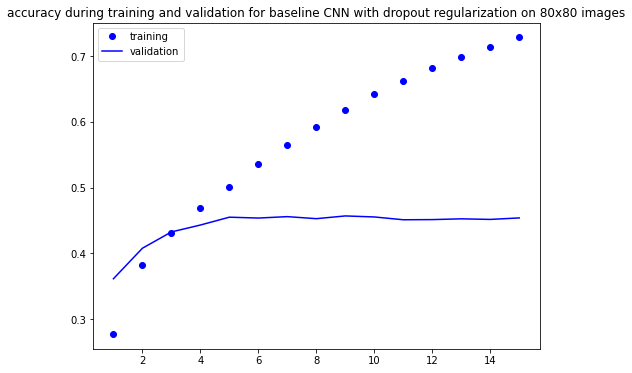

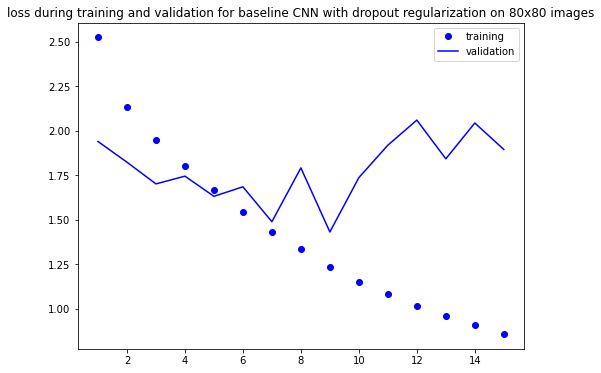

In [11]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network but dropout effet is visible
#with accuracy increasing linearly on training set but its slope is less than pure CNN 
#(60% of accuracy after 15 epochs comparing with 90% of the model without the dropout)
#and stabilized also around 45% for validation (3% better than pure CNN)
#Usage of image size 80x80 rather 150x150 gives NO advantage 
#so pretrained VGG16 model based on image input size 150x150 pixels can be used 
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1,len(acc2)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc2,'bo',label='training')
plt.plot(epochs,val_acc2,'b',label='validation')
plt.title('accuracy during training and validation for baseline CNN with dropout regularization on 80x80 images')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss2,'bo',label='training')
plt.plot(epochs,val_loss2,'b',label='validation')
plt.title('loss during training and validation for baseline CNN with dropout regularization on 80x80 images')
plt.legend();

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

model3 = Sequential()
model3.add(base_model) # Ajout du modèle VGG16
model3.add(Flatten())
#model3.add(GlobalAveragePooling2D()) 
model3.add(Dense(1024,activation='relu'))
model3.add(Dropout(rate=0.2))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(rate=0.2))
n_class = 27
model3.add(Dense(n_class, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Flatten will take a tensor of any shape and transform it into a one dimensional tensor (plus the samples dimension) 
#but keeping all values in the tensor. For example a tensor (samples, 10, 20, 1) will be flattened to (samples, 10 * 20 * 1).

#GlobalAveragePooling2D does something different. It applies average pooling on the spatial dimensions 
#until each spatial dimension is one, and leaves other dimensions unchanged.
#In this case values are not kept as they are averaged. 
#For example a tensor (samples, 10, 20, 1) would be output as (samples, 1, 1, 1), 
#assuming the 2nd and 3rd dimensions were spatial (channels last).


In [7]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
#5 modules,blocks inheritated from VGG16
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              8389632   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                1

In [9]:
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history3 = model3.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 668s 317ms/step - loss: 2.0694 - accuracy: 0.4005 - val_loss: 1.8001 - val_accuracy: 0.4718
Epoch 2/10
2109/2109 [==============================] - 635s 301ms/step - loss: 1.7615 - accuracy: 0.4794 - val_loss: 1.7178 - val_accuracy: 0.4941
Epoch 3/10
2109/2109 [==============================] - 633s 300ms/step - loss: 1.6294 - accuracy: 0.5141 - val_loss: 1.6742 - val_accuracy: 0.5072
Epoch 4/10
2109/2109 [==============================] - 630s 299ms/step - loss: 1.5207 - accuracy: 0.5423 - val_loss: 1.6667 - val_accuracy: 0.5154
Epoch 5/10
2109/2109 [==============================] - 631s 299ms/step - loss: 1.4241 - accuracy: 0.5672 - val_loss: 1.6270 - val_accuracy: 0.5274
Epoch 6/10
2109/2109 [==============================] - 628s 298ms/step - loss: 1.3469 - accuracy: 0.5881 - val_loss: 1.6370 - val_accuracy: 0.5277
Epoch 7/10
2109/2

In [10]:
#good practise : always save model after training
model3.save('Rakuten_VGG16_weights_imagenet_classifier1024-512-27.h5')

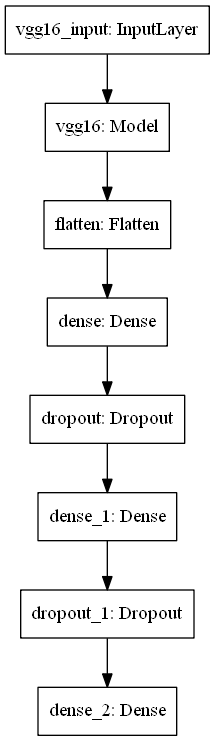

In [2]:
#cell just to create one image of the model as a graph of layers for the Rakuten report
from tensorflow.keras.models import load_model

#
# the best model for this phase of transfer learning study !!!!!!!!
#
model_for_image = load_model('Rakuten_VGG16_weights_imagenet_classifier1024-512-27.h5')
tf.keras.utils.plot_model(model_for_image, to_file='Rakuten_VGG16_weights_imagenet_classifier1024-512-27.png')


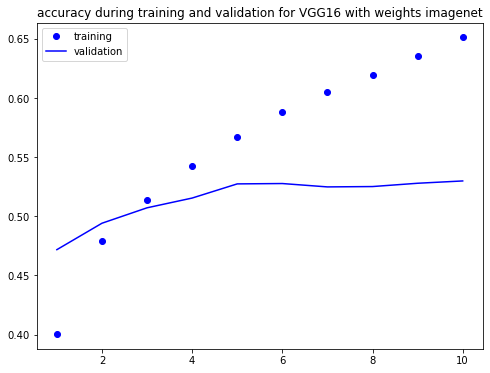

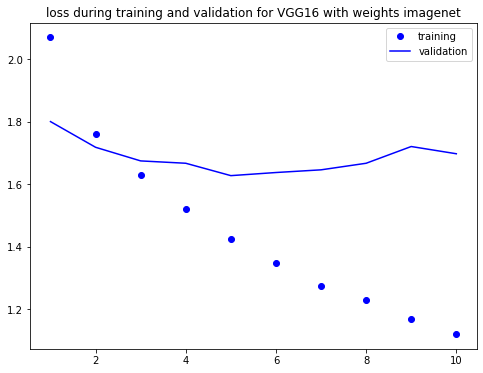

In [11]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network but dropout effet is visible
#with accuracy increasing linearly on training set 
#65% of accuracy after 10 epochs
#and stabilized also around 52.5% for validation (7.5% better than a medium ConvNet with dropout)

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1,len(acc3)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc3,'bo',label='training')
plt.plot(epochs,val_acc3,'b',label='validation')
plt.title('accuracy during training and validation for VGG16 with weights imagenet')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss3,'bo',label='training')
plt.plot(epochs,val_loss3,'b',label='validation')
plt.title('loss during training and validation for VGG16 with weights imagenet')
plt.legend();

In [6]:
import time
# from tensorflow 2.0, keras has been merged in
#from keras.models import load_model
#TypeError: __init__() got an unexpected keyword argument 'ragged'
#As it turns out model you have exported is from tensorflow.keras and not directly from keras API. 
#These two are different. So while loading it might be using tf.ragged tensors that might not be compatible with keras API.

from tensorflow.keras.models import load_model

def transform_image(path, target_size):
    """function that converts an image and put it into a tensor 4D"""
    image = tf.keras.preprocessing.image.load_img(path)
    image_arr = tf.keras.preprocessing.image.img_to_array(image)

    image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
    image_arr = np.expand_dims(image_arr,axis=0)# image 3D becoming a tensor 4D (one dimension added)
    
    return image_arr/255.

#Note : global prediction on df_test, data set not completely unknown as already used for model validation 
#methodology train, validation and test sets not strictly respected :-)
# 
#it is the best model founbd during this pahse of transfer learning study !!!!!
#

model3_sav = load_model('Rakuten_VGG16_weights_imagenet_classifier1024-512-27.h5')

test_pred_class = []
y_test_class = []
target_size = (150,150,3)
num_classes = 27

start = time.time()
for i in range(len(df_test)):
    f ((i == 2000) | (i == 4000) | (i == 6000) | (i == 8000) | (i == 10000) | (i == 12000) | (i == 14000)):
        print("in progress : {0} samples over {1} done ".format(i,len(df_test)))
    img_tensor = transform_image(df_test['nom_img'].iloc[i], target_size)
    test_pred = model3_sav.predict(img_tensor)
    test_pred_class_img = test_pred.argmax(axis = 1)
    test_pred_class.append(list_class[test_pred_class_img[0]])
    
    #y_test = tf.keras.utils.to_categorical(df_test['class_onehot'].iloc[i], num_classes=num_classes)
    #y_test_class_img = y_test.argmax()
    y_test_class.append(list_class[df_test['class_onehot'].iloc[i]])
    
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')
    

print(metrics.classification_report(y_test_class, test_pred_class))




cell execution duration : 11.00 mn
              precision    recall  f1-score   support

          10       0.38      0.35      0.37       597
          40       0.55      0.54      0.54       509
          50       0.30      0.33      0.31       335
          60       0.57      0.57      0.57       179
        1140       0.53      0.43      0.47       512
        1160       0.92      0.85      0.89       774
        1180       0.31      0.28      0.30       160
        1280       0.33      0.41      0.37      1027
        1281       0.31      0.16      0.21       412
        1300       0.50      0.64      0.56      1008
        1301       0.52      0.49      0.50       160
        1302       0.45      0.24      0.31       514
        1320       0.44      0.29      0.35       633
        1560       0.48      0.48      0.48       990
        1920       0.67      0.75      0.70       837
        1940       0.61      0.41      0.49       150
        2060       0.34      0.41      0.37  

In [7]:
print("worse predicted classes : ",name_class[list_class.index(1281)],"  ",name_class[list_class.index(2220)])
print("")
print("classes with bad f1-score (<=32%):")
print(name_class[list_class.index(50)]," ",name_class[list_class.index(1180)]," ",name_class[list_class.index(1302)]," ",name_class[list_class.index(2462)])



worse predicted classes :  jeux_enfants    materiel_animaux_compagnie

classes with bad f1-score (<=32%):
equipement_playstation   univers_de_fiction   peche_lampe_plein_air   materiel_jeux_video


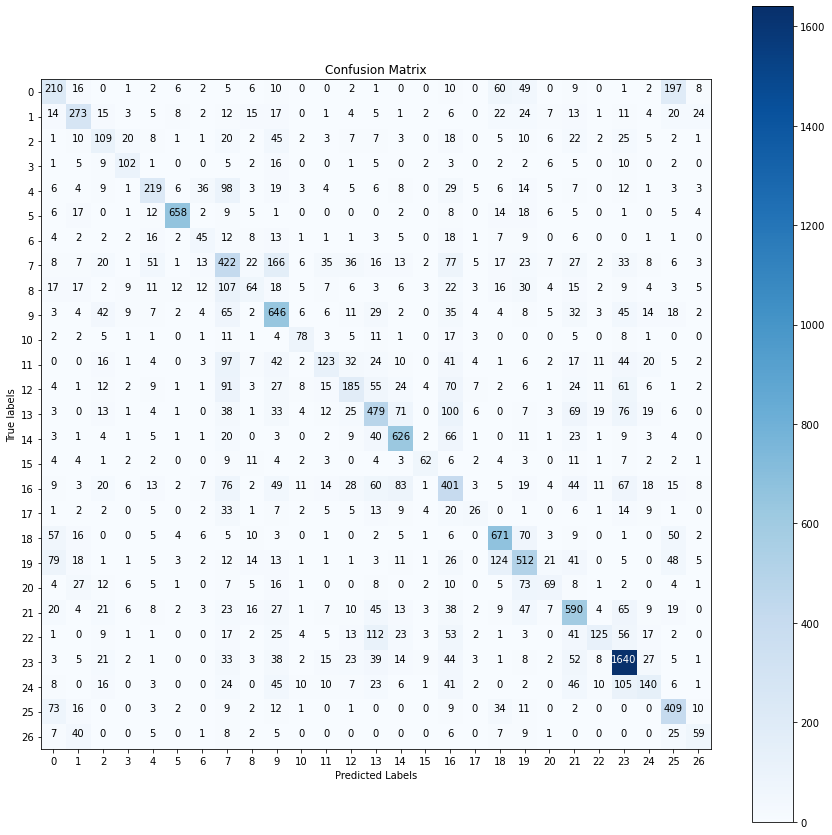

In [8]:
import matplotlib.pyplot as plt  
from sklearn import metrics 
import itertools # To create iterators

cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)

classes = range(0,27)

plt.figure(figsize = (15,15))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)


for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predicted Labels')
plt.show()

# comments 
# real class 0 (editions) , lot of predictions on class 25 (articles_nourriture) , 18 (jeux_video) and 19 (console_de_jeu)
# real class 4 (livres) , lot of predictions on class 7 (mobilier_interieur)
# real class 7 (mobilier_interieur) , lot of predictions on class 9 (literie) 
# real class 8 (jeux_enfants) , lot of predictions on class 7 (mobilier_interieur)
# real class 11 (figurine) , lot of predictions on class 7 (mobilier_interieur)
# real class 12 (materiel_piscine) , lot of predictions on class 7 (jouets_enfant) and 16 (jeux_de_cartes_collection)
# real class 13 (univers_de_fiction) , lot of predictions on class 16 (jeux_de_cartes_collection)
# real class 16 (jeux_de_cartes_collection), lot of predictions on several classes 7,13,14 and 23
# real class 22 (materiel_animaux_compagnie) , lot of predictions on class 13 (univers_de_fiction)
# real class 24 (accessoires_outil) , lot of predictions on class 23 (jeux_sur_PC)

In [11]:
#warning indices of classes for metrics are not equal to one-hot encoded of the classes !!!!!!!


#To try to understand wrong predictions of real class 10 (one hot encoded 0)
for j in range(cnf_matrix.shape[0]):
    if(cnf_matrix[0,j] >42 and j!=0):
        mismatched_class = name_class[j]
        print("La classe {0} ({2} {3}) a souvent été pris pour la classe {1} ({4} {5}) ".format(0,j,list_class[0],name_class[0],list_class[j],name_class[j]))
print("")
#To try to understand wrong predictions of real class 1281 (one hot encoded 8)
for j in range(cnf_matrix.shape[0]):
    if(cnf_matrix[8,j] >29 and j!=8):
        mismatched_class = name_class[j]
        print("La classe {0} ({2} {3}) a souvent été pris pour la classe {1} ({4} {5}) ".format(8,j,list_class[8],name_class[8],list_class[j],name_class[j]))
print("")
#To try to understand wrong predictions of real class 50 (one hot encoded 22)
for j in range(cnf_matrix.shape[0]):
    if(cnf_matrix[22,j] >50 and j!=22):
        mismatched_class = name_class[j]
        print("La classe {0} ({2} {3}) a souvent été pris pour la classe {1} ({4} {5})".format(22,j,list_class[2],name_class[22],list_class[j],name_class[j]))

print("")        
print("Recall of relationship between model and Rakuten classes :")
name_class = ['editions','magazines',"equipement_playstation","jouets_enfant","livres","fournitures_scolaires","materiel_jardin","mobilier_interieur","jeux_enfants","literie","livres_par_lot","figurine","materiel_piscine","univers_de_fiction","equipements_telecommandes","materiel_jeux_video","jeux_de_cartes_collection","decoration","jeux_video","console_de_jeu","materiel_bebe","peche_lampe_plein_air","materiel_animaux_compagnie","jeux_sur_PC","accessoires_outil","articles_nourriture","vetements_nouveau-né_et_billard_flechettes"] 
list_class = [10, 2280 ,  50 ,1280 ,2705, 2522, 2582, 1560, 1281, 1920, 2403, 1140, 2583, 1180, 1300 ,2462, 1160, 2060 , 40,   60 ,1320 ,1302 ,2220 ,2905, 2585, 1940 ,1301]
list_class_onehot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

df_link_class_nbr_name = pd.DataFrame({'class nbr Rakuten': list_class , 'class name given by team': name_class, 'class nbr from sklearn metrics': list_class_onehot})
display(df_link_class_nbr_name.head(len(df_link_class_nbr_name)))



La classe 0 (10 editions) a souvent été pris pour la classe 18 (40 jeux_video) 
La classe 0 (10 editions) a souvent été pris pour la classe 19 (60 console_de_jeu) 
La classe 0 (10 editions) a souvent été pris pour la classe 25 (1940 articles_nourriture) 

La classe 8 (1281 jeux_enfants) a souvent été pris pour la classe 7 (1560 mobilier_interieur) 
La classe 8 (1281 jeux_enfants) a souvent été pris pour la classe 19 (60 console_de_jeu) 

La classe 22 (50 materiel_animaux_compagnie) a souvent été pris pour la classe 13 (1180 univers_de_fiction)
La classe 22 (50 materiel_animaux_compagnie) a souvent été pris pour la classe 16 (1160 jeux_de_cartes_collection)
La classe 22 (50 materiel_animaux_compagnie) a souvent été pris pour la classe 23 (2905 jeux_sur_PC)

Recall of relationship between model and Rakuten classes :


,class nbr Rakuten,class name given by team,class nbr from sklearn metrics
0,10,editions,0
1,2280,magazines,1
2,50,equipement_playstation,2
3,1280,jouets_enfant,3
4,2705,livres,4
5,2522,fournitures_scolaires,5
6,2582,materiel_jardin,6
7,1560,mobilier_interieur,7
8,1281,jeux_enfants,8
9,1920,literie,9


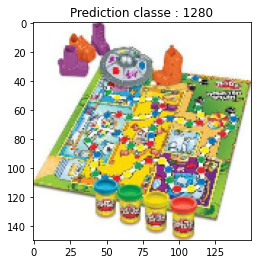

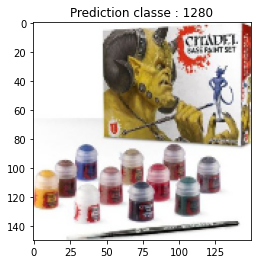

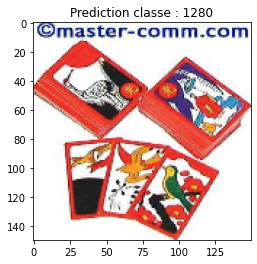

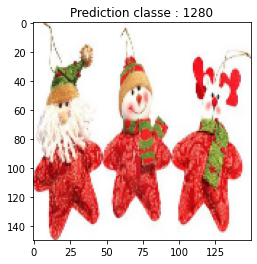

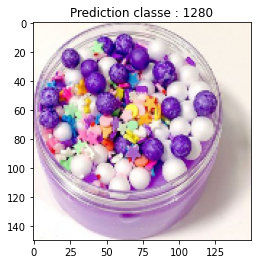

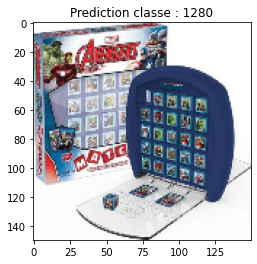

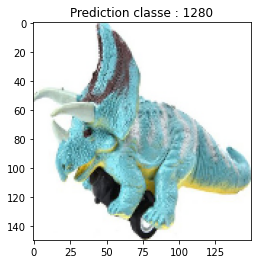

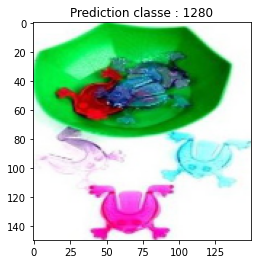

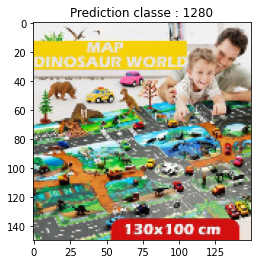

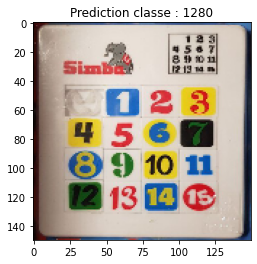

nombre d'images pour la classe 1281 : 412
nombre d'erreurs de prédictions de la classe réelle 1281 (jeux_enfants) pour la classe 1280 (jouets_enfant) : 107


In [72]:
#examples of images of real class 1281 predicted class 1280
nbr_class1281 = 0
bad_pred_class1281_1280 = 0
j = 0


def transform_image(path, target_size):
    """function that converts an image into a tensor 4D"""
    image = tf.keras.preprocessing.image.load_img(path)
    image_arr = tf.keras.preprocessing.image.img_to_array(image)

    image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
    image_arr = np.expand_dims(image_arr,axis=0)
    
    return image_arr/255.

target_size = (150,150,3)
plt.figure(figsize = (4,4))

for i in range(len(y_test_class)):
    if (y_test_class[i] == 1281):
        nbr_class1281 += 1
    if ((y_test_class[i] == 1281) and (test_pred_class[i]  == 1280)):
        bad_pred_class1281_1280 += 1
        if (j < 10):
            j += 1
            img_tensor = transform_image(df_test['nom_img'].iloc[i], target_size)
            plt.imshow(img_tensor[0])
            plt.title('Prediction classe: ' + str(test_pred_class[i]))
            plt.show()


             
print("nombre d'images pour la classe 1281 :",nbr_class1281)
print("nombre d'erreurs de prédictions de la classe réelle 1281 (jeux_enfants) pour la classe 1280 (jouets_enfant) :",bad_pred_class1281_1280)


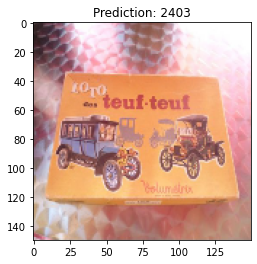

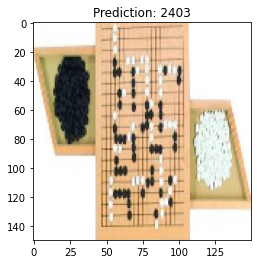

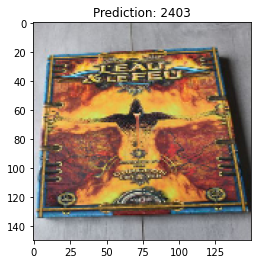

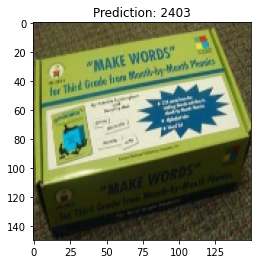

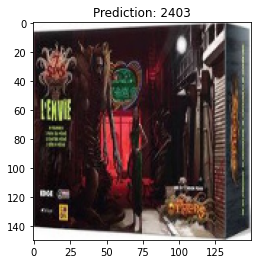

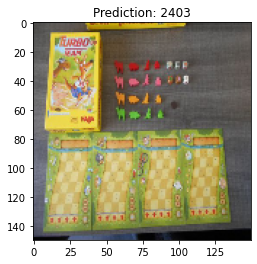

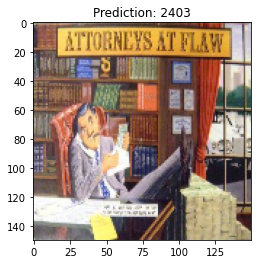

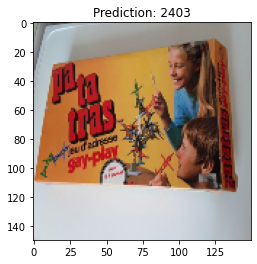

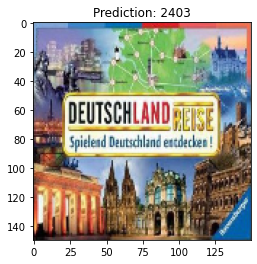

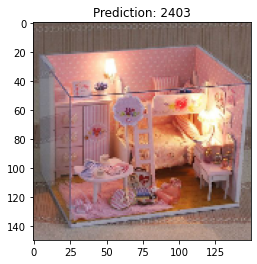

nombre d'erreurs de prédictions de la classe réelle 1281 (jeux_enfants) pour la classe 2403 (livres_par_lot) : 30


In [71]:
#examples of images of real class 1281 predicted class 2403
k = 0
bad_pred_class1281_2403 = 0
plt.figure(figsize = (4,4))            
for i in range(len(y_test_class)):
    if ((y_test_class[i] == 1281) and (test_pred_class[i]  == 2403)):
        bad_pred_class1281_2403 += 1
        if (k < 10):
             k += 1
             img_tensor = transform_image(df_test['nom_img'].iloc[i], target_size)
             plt.imshow(img_tensor[0])
             plt.title('Prediction classe : ' + str(test_pred_class[i]))
             plt.show()
                
print("nombre d'erreurs de prédictions de la classe réelle 1281 (jeux_enfants) pour la classe 2403 (livres_par_lot) :",bad_pred_class1281_2403)

In [6]:
#fine tuning
#block5_conv1 ,conv2 and conv3 unfreezed of pretrained VGG16

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
import time

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

model4 = Sequential()
model4.add(base_model) # Ajout du modèle VGG16
model4.add(Flatten())
#model4.add(GlobalAveragePooling2D()) 
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(rate=0.2))
n_class = 27
model4.add(Dense(n_class, activation='softmax'))

    
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history4 = model4.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')
    


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 679s 322ms/step - loss: 2.5576 - accuracy: 0.2476 - val_loss: 2.2033 - val_accuracy: 0.3509
Epoch 2/10
2109/2109 [==============================] - 676s 320ms/step - loss: 2.1190 - accuracy: 0.3838 - val_loss: 2.0524 - val_accuracy: 0.3880
Epoch 3/10
2109/2109 [==============================] - 674s 320ms/step - loss: 1.9505 - accuracy: 0.4263 - val_loss: 1.9885 - val_accuracy: 0.4178
Epoch 4/10
2109/2109 [==============================] - 672s 319ms/step - loss: 1.8426 - accuracy: 0.4531 - val_loss: 1.9428 - val_accuracy: 0.4256
Epoch 5/10
2109/2109 [==============================] - 669s 317ms/step - loss: 1.7544 - accuracy: 0.4742 - val_loss: 1.8843 - val_accuracy: 0.4424
Epoch 6/10
2109/2109 [==============================] - 677s 321ms/step - loss: 1.6888 - accuracy: 0.4944 - val_loss: 1.9442 - val_accuracy: 0.4376
Epoch 7/10
2109/2

In [7]:
#good practise : always save model after training
model4.save('Rakuten_VGG16_weights_imagenet_with_block5_conv_fine-tuned.h5')

ERROR! Session/line number was not unique in database. History logging moved to new session 113


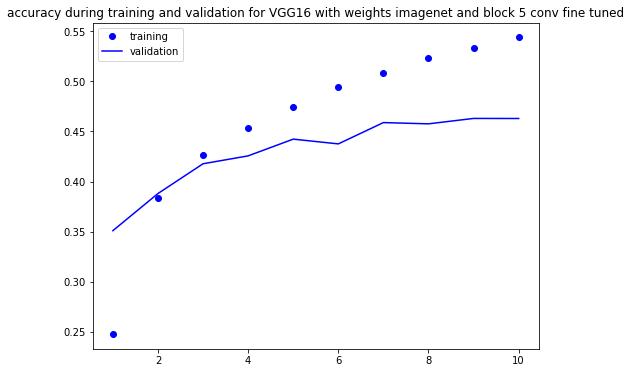

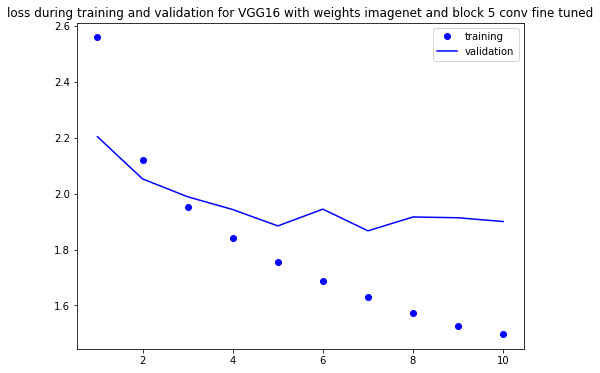

In [8]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network but dropout effet is visible
#with accuracy increasing linearly on training set 
#54% of accuracy after 10 epochs
#and stabilized around 45% for validation (7% worse than pure VGG16 )

acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(1,len(acc4)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc4,'bo',label='training')
plt.plot(epochs,val_acc4,'b',label='validation')
plt.title('accuracy during training and validation for VGG16 with weights imagenet and block 5 conv fine tuned')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss4,'bo',label='training')
plt.plot(epochs,val_loss4,'b',label='validation')
plt.title('loss during training and validation for VGG16 with weights imagenet and block 5 conv fine tuned')
plt.legend();

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.xception import Xception

#consult keras available applications  
#Top 5 Accuracy score
#
# Model Xception
base_model = Xception(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freeze all layers of the pretrained model
for layer in base_model.layers: 
    layer.trainable = False

model5 = Sequential()
model5.add(base_model) # Ajout du modèle Xception
model5.add(Flatten())
# as output size of Xception model is important
# smaller neuron number configured (256 rather 1024) for classifier input layer 
model5.add(Dense(1024,activation='relu'))
model5.add(Dropout(rate=0.2))
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(rate=0.2))
n_class = 27
model5.add(Dense(n_class, activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
#convolution blocks and also separable Convolution blocks of Xception
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [13]:
#Xception and classification on top 
model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              52429824  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 27)               

In [14]:
#less than VGG16 model with unchanged weights, validation accuracy flat around 48%
# huge parameters number for classifier to train due to output shape of Xception model
# not enough samples/images in dataset ??
# bad configuration clearly as validation increase pratically does not exist at all  !!!!
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history5 = model5.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 613s 291ms/step - loss: 2.4407 - accuracy: 0.3287 - val_loss: 2.2687 - val_accuracy: 0.3557
Epoch 2/10
2109/2109 [==============================] - 606s 287ms/step - loss: 2.0654 - accuracy: 0.4049 - val_loss: 2.0900 - val_accuracy: 0.3916
Epoch 3/10
2109/2109 [==============================] - 604s 287ms/step - loss: 1.9259 - accuracy: 0.4379 - val_loss: 2.0922 - val_accuracy: 0.4075
Epoch 4/10
2109/2109 [==============================] - 608s 288ms/step - loss: 1.8319 - accuracy: 0.4623 - val_loss: 2.0935 - val_accuracy: 0.3933
Epoch 5/10
2109/2109 [==============================] - 611s 290ms/step - loss: 1.7492 - accuracy: 0.4865 - val_loss: 2.1271 - val_accuracy: 0.4246
Epoch 6/10
2109/2109 [==============================] - 607s 288ms/step - loss: 1.6629 - accuracy: 0.5092 - val_loss: 2.1872 - val_accuracy: 0.4213
Epoch 7/10
2109/2

In [15]:
#good practise : always save model after training
model5.save('Rakuten_Xception_weights_imagenet_classifier1024-512-27.h5')

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.xception import Xception

#consult keras available applications  
#Top 5 Accuracy score
#
# Model Xception
base_model = Xception(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freeze all layers of the pretrained model
for layer in base_model.layers: 
    layer.trainable = False

model7 = Sequential()
model7.add(base_model) # Ajout du modèle Xception
model7.add(Flatten())
# as output size of Xception model is important
# smaller neuron number configured (256 rather 1024) for classifier input layer 
model7.add(Dense(256,activation='relu'))
model7.add(Dropout(rate=0.2))
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(rate=0.2))
model7.add(Dense(256,activation='relu'))
model7.add(Dropout(rate=0.2))
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(rate=0.2))
n_class = 27
model7.add(Dense(n_class, activation='softmax'))

model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
#Xception and classification on top 
model7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

In [18]:
#less than VGG16 model with unchanged weights, validation accuracy flat around 38%
# small input classifier layer number to avoid huge increase in trainable parameters
# due to output shape of Xception model
# and add in counterpart one hidden layer
# bad configuration : accuracy is around 38%
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history7 = model7.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 589s 279ms/step - loss: 2.4993 - accuracy: 0.2864 - val_loss: 2.3456 - val_accuracy: 0.3306
Epoch 2/10
2109/2109 [==============================] - 583s 277ms/step - loss: 2.2408 - accuracy: 0.3507 - val_loss: 2.1863 - val_accuracy: 0.3557
Epoch 3/10
2109/2109 [==============================] - 580s 275ms/step - loss: 2.1500 - accuracy: 0.3738 - val_loss: 2.1623 - val_accuracy: 0.3659
Epoch 4/10
2109/2109 [==============================] - 580s 275ms/step - loss: 2.0812 - accuracy: 0.3920 - val_loss: 2.2184 - val_accuracy: 0.3793
Epoch 5/10
2109/2109 [==============================] - 583s 276ms/step - loss: 2.0324 - accuracy: 0.4060 - val_loss: 2.2053 - val_accuracy: 0.3797
Epoch 6/10
2109/2109 [==============================] - 587s 278ms/step - loss: 1.9817 - accuracy: 0.4203 - val_loss: 2.1347 - val_accuracy: 0.3933
Epoch 7/10
2109/2

In [19]:
#good practise : always save model after training
model7.save('Rakuten_Xception_weights_imagenet_classifier256-256-256-27.h5')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

model6 = Sequential()
model6.add(base_model) # Ajout du modèle VGG16
model6.add(Flatten())
model6.add(Dense(2048,activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(Dense(1024,activation='relu'))
model6.add(Dropout(rate=0.2))
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(rate=0.2))
n_class = 27
model6.add(Dense(n_class, activation='softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
#VGG16 and classifier big configuration on top 
model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              16779264  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5

In [8]:
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history6 = model6.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 647s 307ms/step - loss: 2.1232 - accuracy: 0.3837 - val_loss: 1.8700 - val_accuracy: 0.4499
Epoch 2/10
2109/2109 [==============================] - 627s 297ms/step - loss: 1.8217 - accuracy: 0.4658 - val_loss: 1.7445 - val_accuracy: 0.4885
Epoch 3/10
2109/2109 [==============================] - 625s 296ms/step - loss: 1.6990 - accuracy: 0.4992 - val_loss: 1.7025 - val_accuracy: 0.4989
Epoch 4/10
2109/2109 [==============================] - 624s 296ms/step - loss: 1.6026 - accuracy: 0.5235 - val_loss: 1.6894 - val_accuracy: 0.5062
Epoch 5/10
2109/2109 [==============================] - 622s 295ms/step - loss: 1.5385 - accuracy: 0.5413 - val_loss: 1.6632 - val_accuracy: 0.5150
Epoch 6/10
2109/2109 [==============================] - 620s 294ms/step - loss: 1.4689 - accuracy: 0.5593 - val_loss: 1.6326 - val_accuracy: 0.5259
Epoch 7/10
2109/2

In [9]:
#good practise : always save model after training
model6.save('Rakuten_VGG16_weights_imagenet_classifier2048-1024-512-27.h5')

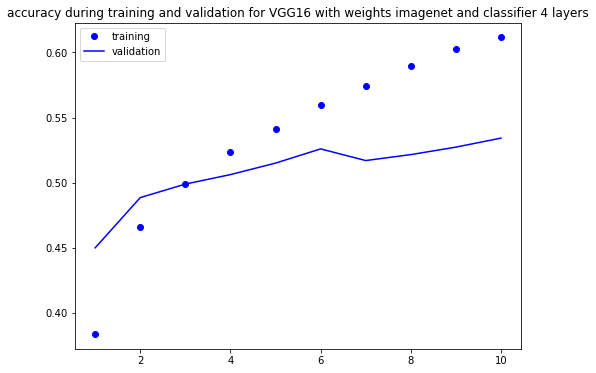

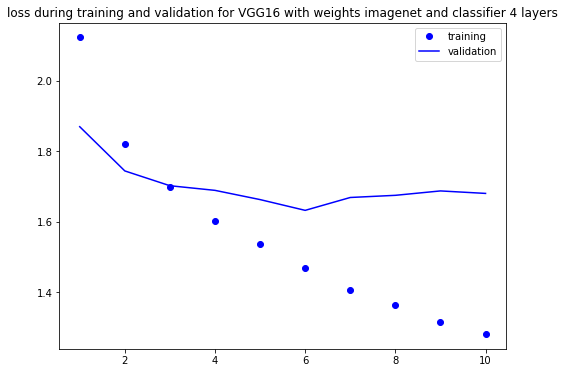

In [10]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network but dropout effet is visible
#with accuracy increasing linearly on training set 
#61% of accuracy after 10 epochs
#and stabilized also around 52.5% for validation (7.5% better than a medium ConvNet with dropout)

acc6 = history6.history['accuracy']
val_acc6 = history6.history['val_accuracy']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs = range(1,len(acc6)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc6,'bo',label='training')
plt.plot(epochs,val_acc6,'b',label='validation')
plt.title('accuracy during training and validation for VGG16 with weights imagenet and classifier 4 layers')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss6,'bo',label='training')
plt.plot(epochs,val_loss6,'b',label='validation')
plt.title('loss during training and validation for VGG16 with weights imagenet and classifier 4 layers')
plt.legend();